<a href="https://colab.research.google.com/github/Gugo-le/school_record_/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !wget -q https://github.com/rickiepark/aiml4coders/raw/main/ch05/sarcasm.json
    !mkdir ../ch05
    !mv sarcasm.json ../ch05

# RNN으로 텍스트 분류기 만들기


In [4]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from bs4 import BeautifulSoup
import string
import tensorflow as tf

In [5]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [6]:
with open("../ch05/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []
for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

<ipython-input-6-26e5c469036e>:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


In [7]:
vocab_size = 20000
embedding_dim = 64
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 23000

In [8]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                                padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

In [10]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [14]:
num_epochs = 15
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels))

Epoch 1/15
719/719 [==============================] - 39s 54ms/step - loss: 0.6323 - accuracy: 0.6297 - val_loss: 0.4812 - val_accuracy: 0.7697
Epoch 2/15
719/719 [==============================] - 38s 52ms/step - loss: 0.3774 - accuracy: 0.8316 - val_loss: 0.4243 - val_accuracy: 0.7962
Epoch 3/15
719/719 [==============================] - 38s 52ms/step - loss: 0.2672 - accuracy: 0.8903 - val_loss: 0.4199 - val_accuracy: 0.8072
Epoch 4/15
719/719 [==============================] - 38s 52ms/step - loss: 0.2025 - accuracy: 0.9224 - val_loss: 0.4466 - val_accuracy: 0.8024
Epoch 5/15
719/719 [==============================] - 38s 52ms/step - loss: 0.1557 - accuracy: 0.9430 - val_loss: 0.4835 - val_accuracy: 0.8059
Epoch 6/15
719/719 [==============================] - 38s 52ms/step - loss: 0.1206 - accuracy: 0.9576 - val_loss: 0.5530 - val_accuracy: 0.8048
Epoch 7/15
719/719 [==============================] - 37s 52ms/step - loss: 0.0918 - accuracy: 0.9673 - val_loss: 0.6272 - val_accuracy:

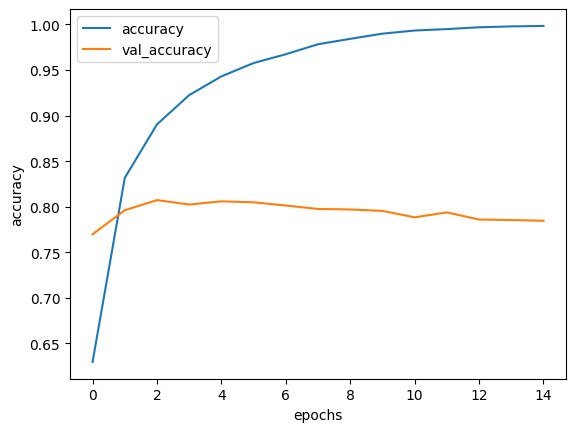

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

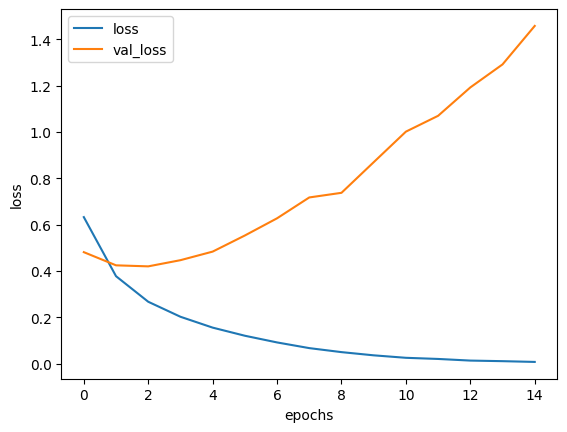

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

## 스태킹 LSTM

In [17]:
# LSTM 층을 쌓는 방법: Dense 층을 사용하는 것처럼 하나의 층을 추가하면 된다.
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)), # 마지막 층을 제외한 모든 층은 return_sequences = True라고 설정해줘야 한다.
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.00001,
                                beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',
              optimizer=adam, metrics=['accuracy'])

In [18]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels))

Epoch 1/30
719/719 [==============================] - 77s 98ms/step - loss: 0.6874 - accuracy: 0.5595 - val_loss: 0.6815 - val_accuracy: 0.5700
Epoch 2/30
719/719 [==============================] - 69s 97ms/step - loss: 0.6824 - accuracy: 0.5596 - val_loss: 0.6778 - val_accuracy: 0.5700
Epoch 3/30
719/719 [==============================] - 70s 97ms/step - loss: 0.6766 - accuracy: 0.5597 - val_loss: 0.6685 - val_accuracy: 0.5702
Epoch 4/30
719/719 [==============================] - 70s 97ms/step - loss: 0.6524 - accuracy: 0.6181 - val_loss: 0.6215 - val_accuracy: 0.6775
Epoch 5/30
719/719 [==============================] - 70s 97ms/step - loss: 0.5599 - accuracy: 0.7224 - val_loss: 0.5222 - val_accuracy: 0.7404
Epoch 6/30
719/719 [==============================] - 70s 97ms/step - loss: 0.4549 - accuracy: 0.7900 - val_loss: 0.4971 - val_accuracy: 0.7544
Epoch 7/30
719/719 [==============================] - 69s 97ms/step - loss: 0.4072 - accuracy: 0.8175 - val_loss: 0.4846 - val_accuracy:

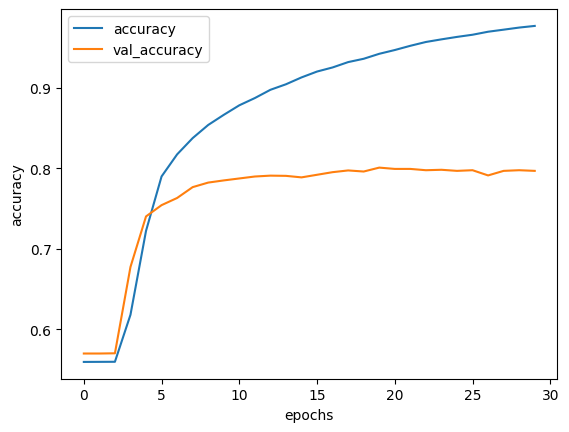

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

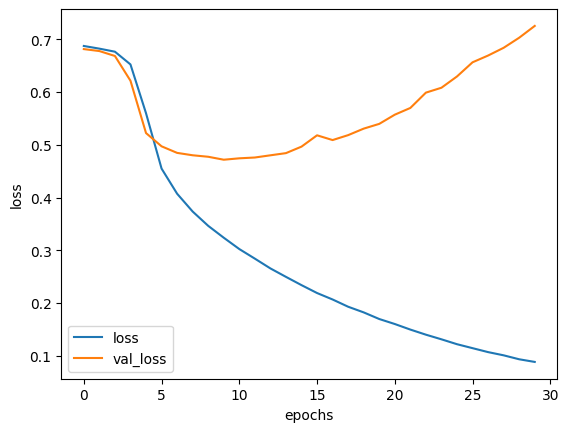

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()